Condiciones iniciales 
Ángulo theta 1.5707963267948966 
Ángulo phi 0.0 
Primera Derivada Ángulo theta 1.0 
Primera Derivada Ángulo phi 1.0


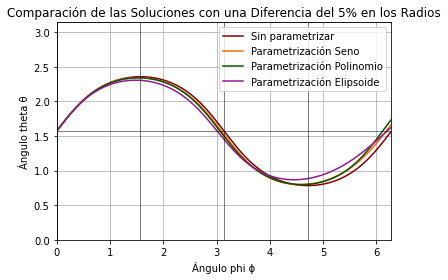

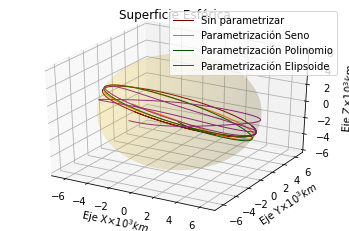

In [ ]:
from math import sin,cos,tan,pi
from pylab import *
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math
import os
#define las funciones sin parametrizar
def fx1 (x1,y1,theta1):
    ec=(sin(theta1))*(cos(theta1))*y1**2
    return ec

def fy1 (x1,y1,theta1):
    ec=-2*(1/(tan(theta1)))*x1*y1
    return ec
           
def ftheta1 (x1):
    ec=x1
    return ec
           
def fphi1 (y1):
    ec=y1
    return ec
#------------------------------------------------------------------------------------------------------------------------------------------------------------
#funcion parametrizada con seno
#Definicion de los radios
a=6.378  #radio ecuatorial
b=6.378-(6.378*0.05)
c=6.371 #radio polar
#define las funciones
def fx2 (x2,y2,theta2):
    A1=(((a-b)**2)+(b**2)+(2*(a-b)*b*sin(theta2)))
    B1=(b+((a-b)*sin(theta2)))
    ec=-(((a-b)*B1*cos(theta2)*(x2**2))/A1)+((sin(theta2)*cos(theta2)*B1*(b+(2*(a-b)*sin(theta2)))*(y2**2))/(A1))
    return ec
def fy2(x2,y2,theta2):
    ec=-2*((1/(tan(theta2)))+(((a-b)*cos(theta2))/(b+(a-b)*sin(theta2))))*x2*y2
    return ec           
def ftheta2 (x2):
    ec=x2
    return ec          
def fphi2 (y2):
    ec=y2
    return ec
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#función parametrizada con polinomio
E=(a-b)
#define las funciones
def fx3 (x3,y3,theta3):
    A1=(b+((4*theta3*E/(pi**2))*(pi-theta3)))
    B1=(4*E/(pi**2))*(pi-(2*theta3))
    C1=(16*(E**2)*(pi-(2*theta3)))+((pi**4)*(A1**2))
    ec=((32*(E**2)*(pi-(2*theta3))*(x3**2))/C1)+(((pi**4)*(sin(theta3))*A1*((A1*cos(theta3))+(B1*sin(theta3)))*(y3**2))/C1)
    return ec
def fy3 (x3,y3,theta3):
    A1=b+((4*theta3*E/(pi**2))*(pi-theta3))
    B1=(4*E/(pi**2))*(pi-(2*theta3))
    ec=-2*((B1/A1)+(1/(tan(theta3))))*x3*y3
    return ec           
def ftheta3 (x3):
    ec=x3
    return ec          
def fphi3 (y3):
    ec=y3
    return ec
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#función parametrizada con elipsoide
def fx4 (x4,y4,theta4):
    #constante
    C3=((a**2)-(b**2))
    #definición del seno y el coseno
    si=(sin(theta4))
    co=(cos(theta4))
    #cosiente tipico
    D3=((a**2)*(co**2))+((b**2)*(si**2))
    #parametrización
    E3=(a*b)/(D3**(1/2))
    #derivda de la parametrización
    F3=(a*b*si*co*C3)/(D3**(3/2))
    #factor
    G3=(((si**2)*(co**2)*(C3**2))/(D3**2))+1
    #derivada del factor
    H3=((2*si*co*(C3**2))/(D3))*(((co**2)-(si**2))+((2*(si**2)*(co**2)*C3)/(D3)))
    #función
    ec=-(((F3/E3)+(H3/(G3*2)))*(x4**2))+((si/G3)*(((F3*si)/E3)+co)*(y4**2))
    return ec
def fy4 (x4,y4,theta4):
    #constante
    C4=((a**2)-(b**2))
    #definición del seno y el coseno
    si=(sin(theta4))
    co=(cos(theta4))
    #cosiente tipico
    D4=((a**2)*(co**2))+((b**2)*(si**2))
    #parametrización
    E4=(a*b)/(D4**(1/2))
    #derivda de la parametrización
    F4=(a*b*si*co*C4)/(D4**(3/2))
    #función
    ec=-2*((F4/E4)+(co/si))*x4*y4
    return ec
                                 
def ftheta4 (x4):
    ec=x4
    return ec          
def fphi4 (y4):
    ec=y4
    return ec
#---------------------------------------------------------------------------------------------------------------------------------------------------------------
n=10000 #int (input(Numero de iteraciones"))         
h=2*pi/n #float(input("Tamaño del paso:"))

#Define las condiciones iniciales sin parametrizar
x1=np.zeros(n)
y1=np.zeros(n)
theta1=np.zeros(n)
phi1=np.zeros(n)
x1[0]=1
y1[0]=1
theta1[0]=pi/2
phi1[0]=0
#Define las condiciones iniciales parametrizadas con seno
x2=np.zeros(n)
y2=np.zeros(n)
theta2=np.zeros(n)
phi2=np.zeros(n)
x2[0]=1
y2[0]=1
theta2[0]=pi/2
phi2[0]=0
#Define las condiciones iniciales parametrizadas con polinomio
x3=np.zeros(n)
y3=np.zeros(n)
theta3=np.zeros(n)
phi3=np.zeros(n)
x3[0]=1
y3[0]=1
theta3[0]=pi/2
phi3[0]=0
#Define las condiciones iniciales parametrizadas con elipsoide
x4=np.zeros(n)
y4=np.zeros(n)
theta4=np.zeros(n)
phi4=np.zeros(n)
x4[0]=1
y4[0]=1
theta4[0]=pi/2
phi4[0]=0
#--------------------------------------------------------------------------------------------------------------------------------------------------------------
#Escribe en pantalla las condiciones iniciales usadas
print('Condiciones iniciales \n''Ángulo theta',theta1[0],'\n''Ángulo phi',phi1[0],'\n''Primera Derivada Ángulo theta',x1[0],'\n''Primera Derivada Ángulo phi',y1[0])
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
#solución sin parametrizar
for j in np.arange(1,n):
    x1[j]=x1[j-1]+(fx1(x1[j-1],y1[j-1],theta1[j-1]))*h
    y1[j]=y1[j-1]+(fy1(x1[j-1],y1[j-1],theta1[j-1]))*h
    theta1[j]=theta1[j-1]+(ftheta1(x1[j-1]))*h
    phi1[j]=phi1[j-1]+(fphi1(y1[j-1]))*h
    #Función para graficar el circulo maximo sin parametrizar
A1 = np.zeros(n)
B1 = np.zeros(n)
C1 = np.zeros(n)
A1[0]=c*sin(theta1[0])*cos(phi1[0])
B1[0]=c*sin(theta1[0])*sin(phi1[0])
C1[0]=c*cos(theta1[0])
for j in np.arange(1,n):
    A1[j]=c*sin(theta1[j])*cos(phi1[j])
    B1[j]=c*sin(theta1[j])*sin(phi1[j])
    C1[j]=c*cos(theta1[j])
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#solución parametro seno
for i in np.arange(1,n):
    x2[i]=x2[i-1]+(fx2(x2[i-1],y2[i-1],theta2[i-1]))*h
    y2[i]=y2[i-1]+(fy2(x2[i-1],y2[i-1],theta2[i-1]))*h
    theta2[i]=theta2[i-1]+(ftheta2(x2[i-1]))*h
    phi2[i]=phi2[i-1]+(fphi2(y1[i-1]))*h
    #Función para graficar el circulo maximo con parametrización seno
A2 = np.zeros(n)
B2 = np.zeros(n)
C2 = np.zeros(n)
A2[0]=(b+((a-b)*sin(theta2[0])))*sin(theta2[0])*cos(phi2[0])
B2[0]=(b+((a-b)*sin(theta2[0])))*sin(theta2[0])*sin(phi2[0])
C2[0]=(b+((a-b)*sin(theta2[0])))*cos(theta2[0])
for i in np.arange(1,n):
    A2[i]=(b+((a-b)*sin(theta2[i])))*sin(theta2[i])*cos(phi2[i])
    B2[i]=(b+((a-b)*sin(theta2[i])))*sin(theta2[i])*sin(phi2[i])
    C2[i]=(b+((a-b)*sin(theta2[i])))*cos(theta2[i])
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#solución parametro polinomio
for k in np.arange(1,n):
    x3[k]=x3[k-1]+(fx3(x2[k-1],y3[k-1],theta3[k-1]))*h
    y3[k]=y3[k-1]+(fy3(x2[k-1],y3[k-1],theta3[k-1]))*h
    theta3[k]=theta3[k-1]+(ftheta3(x3[k-1]))*h
    phi3[k]=phi3[k-1]+(fphi3(y3[k-1]))*h
    #Función para graficar el circulo maximo con parametrización seno
A3 = np.zeros(n)
B3 = np.zeros(n)
C3 = np.zeros(n)
A3[0]=(b+((4*theta3[0]*E/(pi**2))*(pi-theta3[0])))*sin(theta3[0])*cos(phi3[0])
B3[0]=(b+((4*theta3[0]*E/(pi**2))*(pi-theta3[0])))*sin(theta3[0])*sin(phi3[0])
C3[0]=(b+((4*theta3[0]*E/(pi**2))*(pi-theta3[0])))*cos(theta3[0])
for k in np.arange(1,n):
    A3[k]=(b+((4*theta3[k]*E/(pi**2))*(pi-theta3[k])))*sin(theta3[k])*cos(phi3[k])
    B3[k]=(b+((4*theta3[k]*E/(pi**2))*(pi-theta3[k])))*sin(theta3[k])*sin(phi3[k])
    C3[k]=(b+((4*theta3[k]*E/(pi**2))*(pi-theta3[k])))*cos(theta3[k])
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#solución parametro elipsoide
for l in np.arange(1,n):
    x4[l]=x4[l-1]+(fx4(x4[l-1],y4[l-1],theta4[l-1]))*h
    y4[l]=y4[l-1]+(fy4(x2[l-1],y4[l-1],theta4[l-1]))*h
    theta4[l]=theta4[l-1]+(ftheta4(x4[l-1]))*h
    phi4[l]=phi4[l-1]+(fphi4(y4[l-1]))*h
    #Función para graficar el circulo maximo con parametrización seno
A4 = np.zeros(n)
B4 = np.zeros(n)
C4 = np.zeros(n)
A4[0]=(a*b)/(sqrt(((a**2)*((cos(theta4[0]))**2))+((b**2)*((sin(theta4[0]))**2))))*sin(theta4[0])*cos(phi4[0])
B4[0]=(a*b)/(sqrt(((a**2)*((cos(theta4[0]))**2))+((b**2)*((sin(theta4[0]))**2))))*sin(theta4[0])*sin(phi4[0])
C4[0]=(a*b)/(sqrt(((a**2)*((cos(theta4[0]))**2))+((b**2)*((sin(theta4[0]))**2))))*cos(theta4[0])
for l in np.arange(1,n):
    A4[l]=(a*b)/(sqrt(((a**2)*((cos(theta4[l]))**2))+((b**2)*((sin(theta4[l]))**2))))*sin(theta4[l])*cos(phi4[l])
    B4[l]=(a*b)/(sqrt(((a**2)*((cos(theta4[l]))**2))+((b**2)*((sin(theta4[l]))**2))))*sin(theta4[l])*sin(phi4[l])
    C4[l]=(a*b)/(sqrt(((a**2)*((cos(theta4[l]))**2))+((b**2)*((sin(theta4[l]))**2))))*cos(theta4[l])
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#print(theta1[i],phi1[i] solución)
plt.plot(phi1,theta1,linewidth=1.5,color=(0.5019607843137255,0,0,1))
plt.plot(phi2,theta2,linewidth=1.5,color=(1,0.4,0,1))
plt.plot(phi3,theta3,linewidth=1.5,color=(0,0.3333333333333333,0,1))
plt.plot(phi4,theta4,linewidth=1.5,color=(0.556862,0.105882,0.564705,1))
# Añado leyenda, tamaño de letra 10, en esquina superior derecha
#legend(('Sin parametrizar',r'$r(\theta)=r_{p}+(r_{e}-r_{p})\sin(\theta)$', r'$r(\theta)=r_{p}+\frac{4A\theta }{\pi ^{2}}(\pi -\theta )$',r'$r(\theta )=\frac{r_{p}r_{e}}{\sqrt{r_{e}^{2}\cos ^{2}\theta +r_{p}^{2}\sin ^{2}\theta }}$'),
legend(('Sin parametrizar','Parametrización Seno', 'Parametrización Polinomio', 'Parametrización Elipsoide'),
prop = {'size':10}, loc = 'upper right')
#Nombre para los ejes
plt.xlabel('Ángulo phi ϕ')
plt.ylabel('Ángulo theta θ')
# Limitar los valores de los ejes.
plt.xlim(0, 2*pi)
plt.ylim(0, pi)
#Nombre para la grafica
plt.title('Comparación de las Soluciones con una Diferencia del 5% en los Radios')
# Establecer el color de los ejes.
plt.axhline(0, linewidth=0.5, color="black")
plt.axhline(pi/2, linewidth=0.5, color="black")
plt.axhline(pi, linewidth=0.5, color="black")
plt.axhline(3*pi/2, linewidth=0.5, color="black")
plt.axvline(0, linewidth=0.5, color="black")
plt.axvline(pi/2, linewidth=0.5, color="black")
plt.axvline(pi, linewidth=0.5, color="black")
plt.axvline(3*pi/2, linewidth=0.5, color="black")
#malla
plt.grid()
#Guardar gráfico como imágen PNG.
plt.savefig("Grafica geodesica1.png")
#grafica en 3d
#leyenda
mpl.rcParams['legend.fontsize'] = 5
#Area de trabajo
fig = plt.figure()
ax = fig.gca(projection='3d')
#Grafica en 3d
#Grafica de la esfera
def sphere(r):
    u = np.linspace(0, 2 * np.pi, 200)
    v = np.linspace(0, np.pi, 200)
    d = (b+((a-b)*sin(v))) * np.outer(np.cos(u), np.sin(v))
    e = (b+((a-b)*sin(v))) * np.outer(np.sin(u), np.sin(v))
    f = (b+((a-b)*sin(v))) * np.outer(np.ones(np.size(u)), np.cos(v))
    return d,e,f
d,e,f = sphere(10)
ax.plot_surface(d, e, f, rstride=3, cstride=3, color=(1,0.8,0,0.1))
ax.plot(A1,B1,C1,linewidth=1,color=(0.5019607843137255,0,0,1), label='Sin parametrizar')
ax.plot(A2,B2,C2,linewidth=1,color=(1,0.4,0,1), label='Parametrización Seno')
ax.plot(A3,B3,C3,linewidth=1,color=(0,0.3333333333333333,0,1), label='Parametrización Polinomio')
ax.plot(A4,B4,C4,linewidth=1,color=(0.556862,0.105882,0.564705,1), label='Parametrización Elipsoide')
ax.legend(fontsize=10)
#Nombre de los ejes
ax.set_xlabel('Eje X'r'$\times 10^{3}km$')
ax.set_ylabel('Eje Y'r'$\times 10^{3}km$')
ax.set_zlabel('Eje Z'r'$\times 10^{3}km$')
#Titulo para la grafica
ax.set_title('Superficie Esférica')
# Guardar gráfico como imágen PNG.
plt.savefig("Circulo máximo1.png")
plt.show()